In [1]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# SVC
from sklearn.svm import SVC
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
# PLT
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-whitegrid')

In [2]:
adult_df = pd.read_csv('adult.data',
                       header = None, delimiter=' *, *', engine='python')
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

In [3]:
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [4]:
adult_df.shape

(32561, 15)

In [5]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
# No null value in dataset but might categorical vars have ? value
for value in ['workclass', 'education',
          'marital_status', 'occupation',
          'relationship','race', 'sex',
          'native_country', 'income']:
    print value,":", sum(adult_df[value] == '?')

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
income : 0


In [8]:
adult_df_rev = adult_df

In [9]:
adult_df_rev.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
# Impute missing values by replacing ? with Private value
for value in ['workclass', 'education',
          'marital_status', 'occupation',
          'relationship','race', 'sex',
          'native_country', 'income']:
    adult_df_rev[value].replace(['?'], [adult_df_rev.describe(include='all')[value][2]], inplace=True)

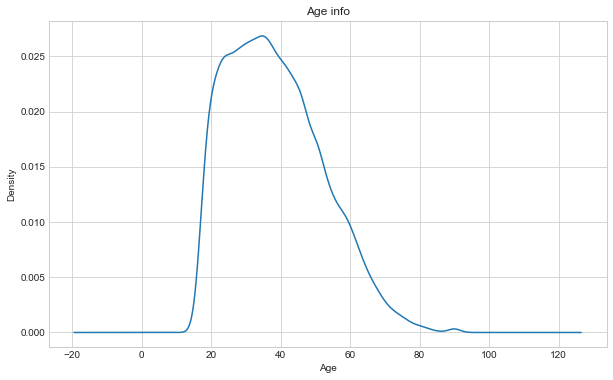

In [11]:
plt.rcParams['figure.figsize'] = (10, 6)
adult_df_rev['age'].plot(kind='density')
plt.title('Age info')                    
plt.xlabel('Age')
plt.show()

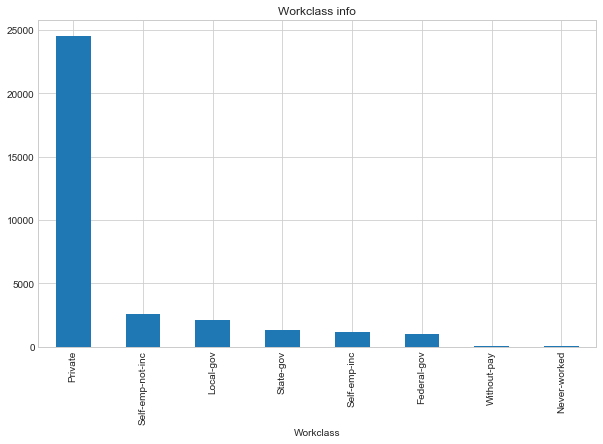

In [12]:
adult_df_rev['workclass'].value_counts().plot(kind='bar')
plt.title('Workclass info')                    
plt.xlabel('Workclass')
plt.show()

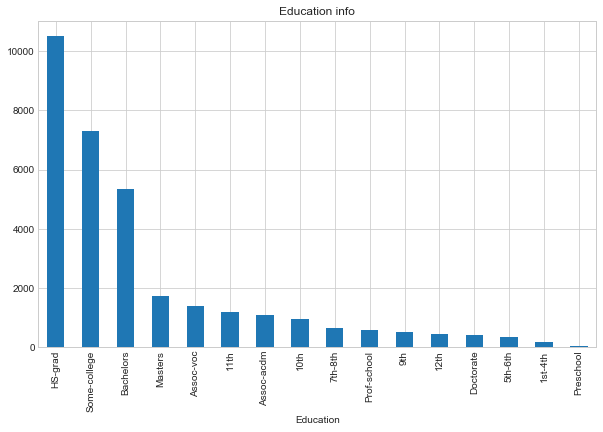

In [13]:
adult_df_rev['education'].value_counts().plot(kind='bar')
plt.title('Education info')                    
plt.xlabel('Education')
plt.show()

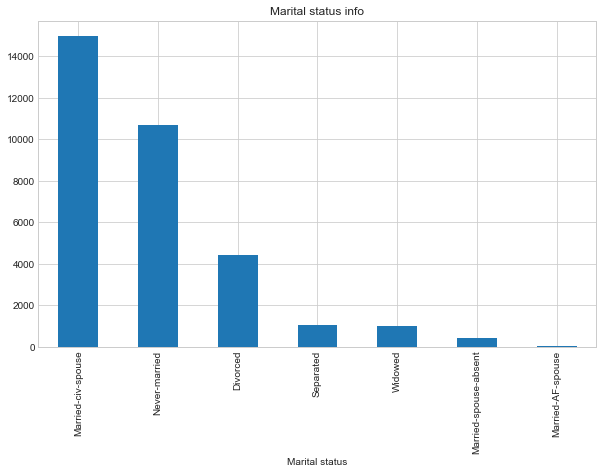

In [14]:
adult_df_rev['marital_status'].value_counts().plot(kind='bar')
plt.title('Marital status info')                    
plt.xlabel('Marital status')
plt.show()

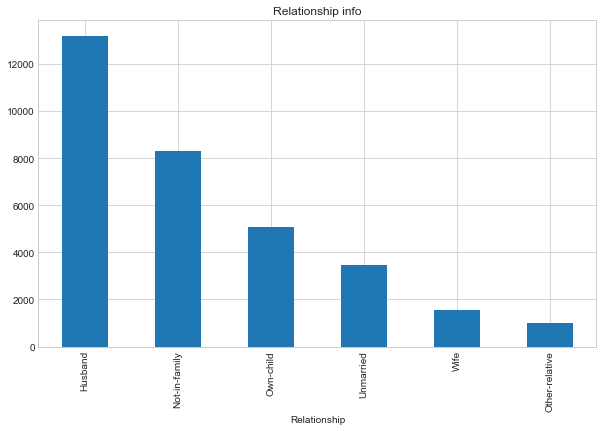

In [15]:
adult_df_rev['relationship'].value_counts().plot(kind='bar')
plt.title('Relationship info')                    
plt.xlabel('Relationship')
plt.show()

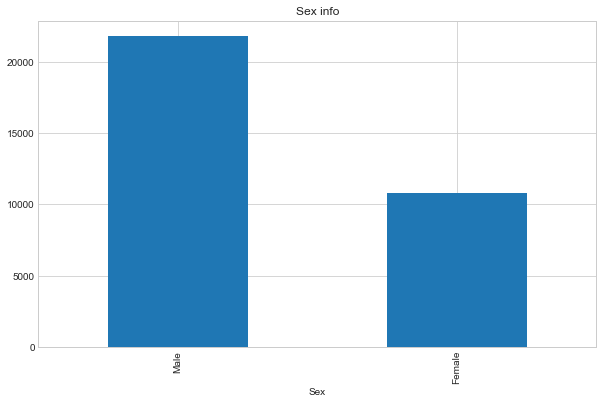

In [16]:
adult_df_rev['sex'].value_counts().plot(kind='bar')
plt.title('Sex info')                    
plt.xlabel('Sex')
plt.show()

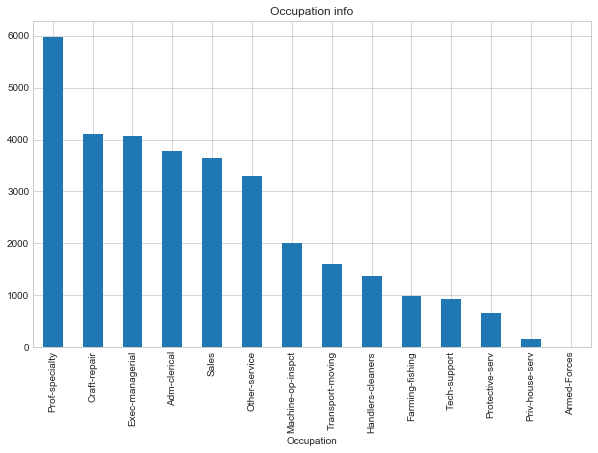

In [17]:
adult_df_rev['occupation'].value_counts().plot(kind='bar')
plt.title('Occupation info')                    
plt.xlabel('Occupation')
plt.show()

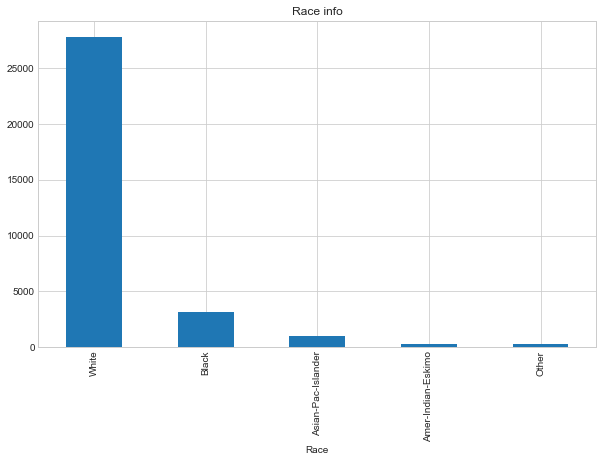

In [18]:
adult_df_rev['race'].value_counts().plot(kind='bar')
plt.title('Race info')                    
plt.xlabel('Race')
plt.show()

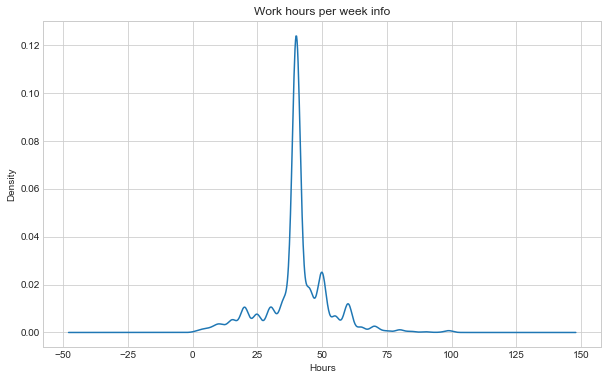

In [19]:
adult_df_rev['hours_per_week'].plot(kind='density')
plt.title('Work hours per week info')                    
plt.xlabel('Hours')
plt.show()

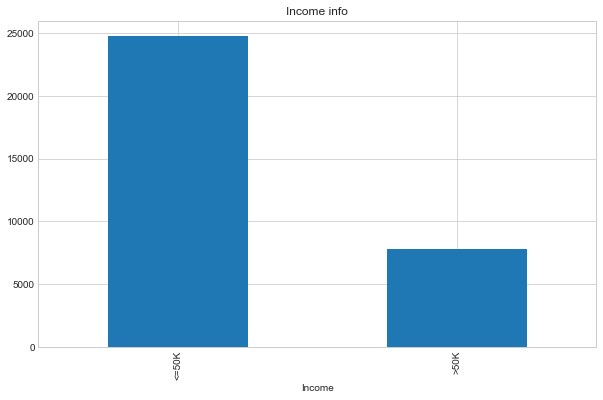

In [20]:
adult_df_rev['income'].value_counts().plot(kind='bar')
plt.title('Income info')                    
plt.xlabel('Income')
plt.show()

Since the most obvious thing income can be differenciate is the amount of time a person can work in a week as in the same condition, people works more hour always have more income. Furthermore, we need to see the distribution of the time people spend on working and the income they earned.

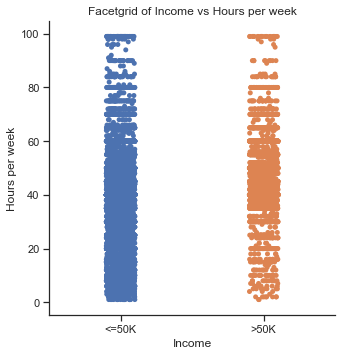

In [21]:
# Work hours & income
plt.rcParams['figure.figsize']=(10,10)
sns.set(style="ticks", color_codes=True)
sns.catplot(x="income", y="hours_per_week", data=adult_df_rev)
plt.xlabel('Income')
plt.ylabel('Hours per week')
plt.title('Facetgrid of Income vs Hours per week')
plt.show()

People tend to said there is a gender pay gap between male and female so we need to look at data and see if it true or not. Since the world we are living are striving to be equal between genders, we would assume both genders work the same amount of time and the graph distribution expected to be similar.

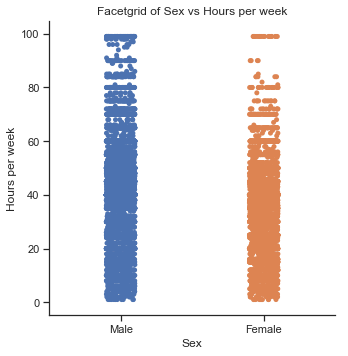

In [22]:
# Sex & hours per week
sns.set(style="ticks", color_codes=True)
sns.catplot(x="sex", y="hours_per_week", data=adult_df_rev)
plt.xlabel('Sex')
plt.ylabel('Hours per week')
plt.title('Facetgrid of Sex vs Hours per week')
plt.show()

As the graph above describe, both gender have equal works time per week upto 60. After that, male tend to works more than 60 hours per week as the male column does not have subtle space, unlike female column. To see if the gender pay gap is true, we would expect female on both lower and higher works time per week to have income lower than male equivalents.

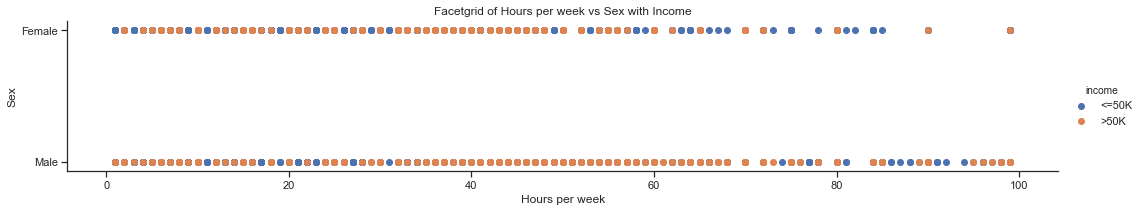

In [23]:
# Sex & work hours
sns.FacetGrid(adult_df_rev, hue="income", height=3, aspect=5).map(plt.scatter, "hours_per_week", "sex").add_legend()
plt.xlabel('Hours per week')
plt.ylabel('Sex')
plt.title('Facetgrid of Hours per week vs Sex with Income')
plt.show()

To furthermore explore if gender pay gap is true, we would expect female to have income less than 50K than male counterpart.

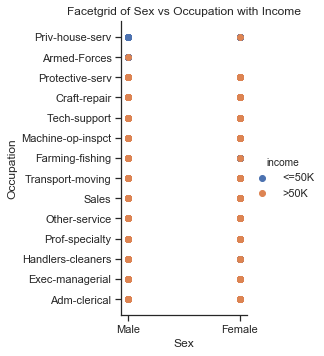

In [24]:
# Sex & occupation
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=0.8).map(plt.scatter, "sex", "occupation").add_legend()
plt.xlabel('Sex')
plt.ylabel('Occupation')
plt.title('Facetgrid of Sex vs Occupation with Income')
plt.show()

Age and marital status is also a factor that can affect income of a person. In some country like Japan, women tend to stop working for their company and become a housewife. Technically, they are unemployment but for Japanese society, housewife also count as a profession. For men, after married, they tend feel that they need to have more responsibility by having better finacial support for their family, especially married with spouse category.

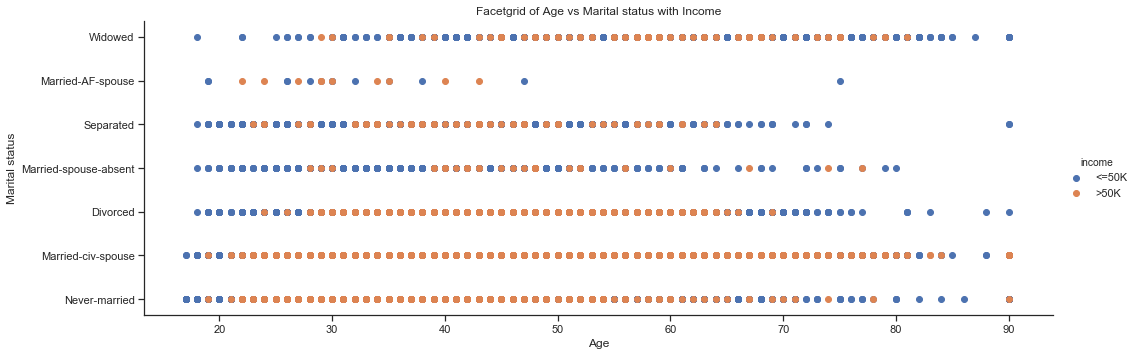

In [25]:
# Age & marital status
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=3).map(plt.scatter, "age", "marital_status").add_legend()
plt.xlabel('Age')
plt.ylabel('Marital status')
plt.title('Facetgrid of Age vs Marital status with Income')
plt.show()

Marital status might slightly change the income of a person but we expect the income will look similar across the education row as there is no clear correlation between marital status and income.

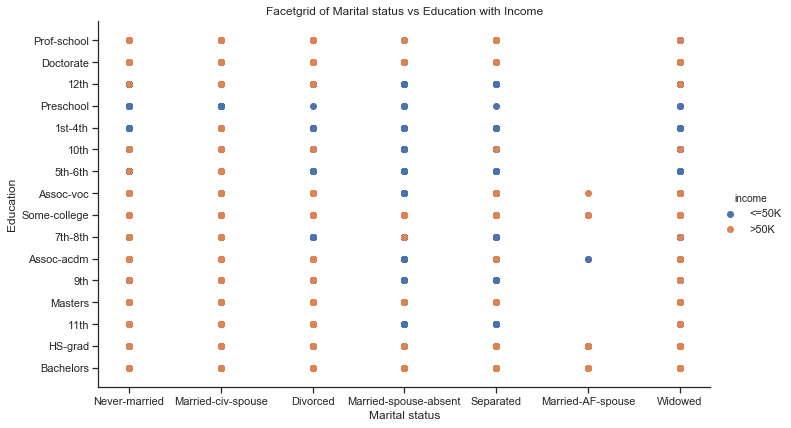

In [26]:
# Education & marital status
sns.FacetGrid(adult_df_rev, hue="income", height=6, aspect=1.7).map(plt.scatter, "marital_status", "education").add_legend()
plt.xlabel('Marital status')
plt.ylabel('Education')
plt.title('Facetgrid of Marital status vs Education with Income')
plt.show()

Occupation might influence wages in various ways. Wage differences compensate for the non-pecuniary characteristics of different jobs. Furthermore, the wage in one occupation may exceed that in another because the job requires superior personal characteristics of incumbents.

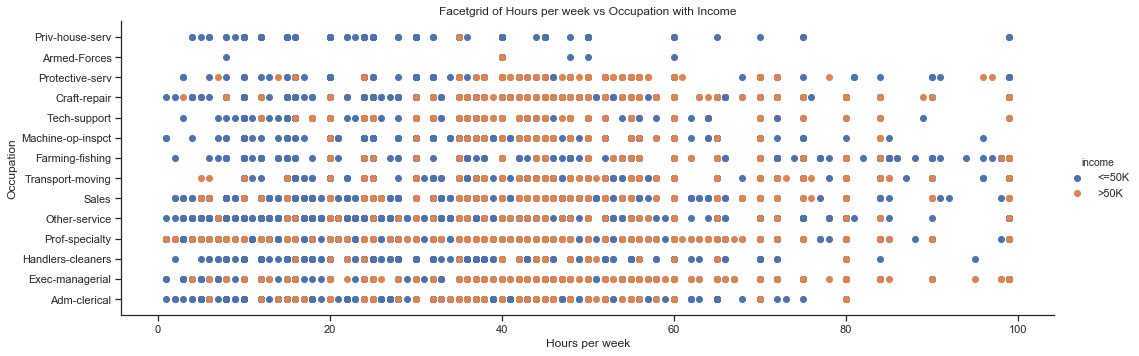

In [27]:
# Work hours & occupation
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=3).map(plt.scatter, "hours_per_week", "occupation").add_legend()
plt.xlabel('Hours per week')
plt.ylabel('Occupation')
plt.title('Facetgrid of Hours per week vs Occupation with Income')
plt.show()

People always said education is important. To know more insight about income of people, we need to explore the education of people. A higher degree than bachelors such as masters, dotorates or prof-school tend to have higher age owners as we expect they need to complete bachelors first then those one later on their life.

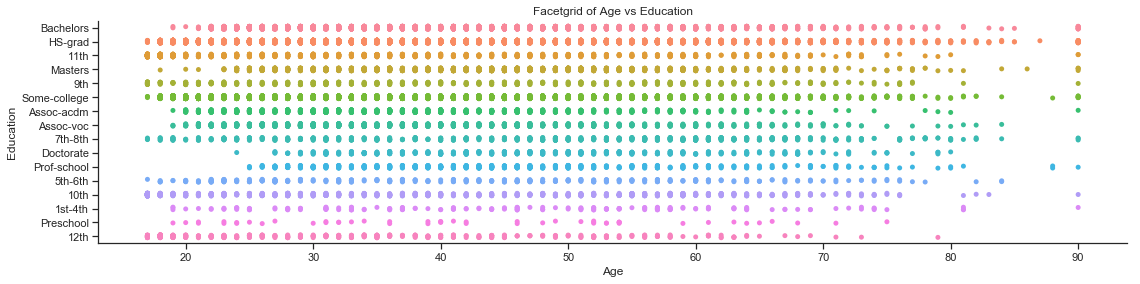

In [28]:
# Age & education
sns.set(style="ticks", color_codes=True)
sns.catplot(x="age", y="education", height=4, aspect=4, data=adult_df_rev)
plt.xlabel('Age')
plt.ylabel('Education')
plt.title('Facetgrid of Age vs Education')
plt.show()

To further explore the correlation between education and income and how it can affect people in their lifetime. A higher education above bachelors usually have late income statistic on the graph as they need to focus on their study in their early 20s but we expect they will have higher chance to cross 50K income mark than others.

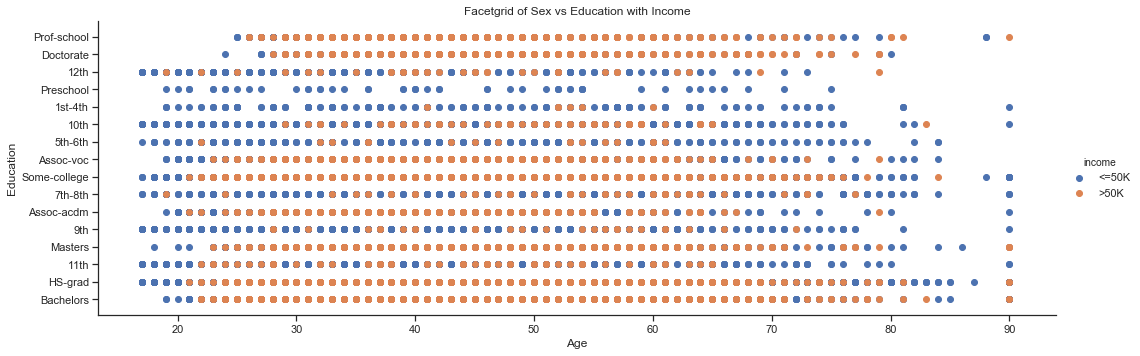

In [29]:
# Education & age
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=3).map(plt.scatter, "age", "education").add_legend()
plt.xlabel('Age')
plt.ylabel('Education')
plt.title('Facetgrid of Sex vs Education with Income')
plt.show()

To be able to work in an high salary evironment, employers expected people to have atleast a higher degree or experiences. People usually need to have higher education than high school graduate in order to have a above 50K income or have to be older than 30 if they do not have atleast a bachelor degree. As a result people have higher education tend to have higher income than group of people do not have.

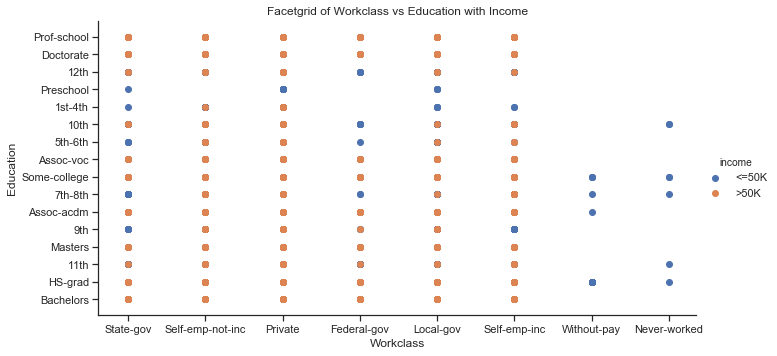

In [30]:
# Workclass & education
sns.FacetGrid(adult_df_rev, hue="income", height=5, aspect=2).map(plt.scatter, "workclass", "education").add_legend()
plt.xlabel('Workclass')
plt.ylabel('Education')
plt.title('Facetgrid of Workclass vs Education with Income')
plt.show()

In [31]:
le = preprocessing.LabelEncoder()
workclass_category = le.fit_transform(adult_df.workclass)
education_category = le.fit_transform(adult_df.education)
marital_category   = le.fit_transform(adult_df.marital_status)
occupation_category = le.fit_transform(adult_df.occupation)
relationship_category = le.fit_transform(adult_df.relationship)
race_category = le.fit_transform(adult_df.race)
sex_category = le.fit_transform(adult_df.sex)
native_country_category = le.fit_transform(adult_df.native_country)

In [32]:
#initialize the encoded categorical columns
adult_df_rev['workclass_category'] = workclass_category
adult_df_rev['education_category'] = education_category
adult_df_rev['marital_category'] = marital_category
adult_df_rev['occupation_category'] = occupation_category
adult_df_rev['relationship_category'] = relationship_category
adult_df_rev['race_category'] = race_category
adult_df_rev['sex_category'] = sex_category
adult_df_rev['native_country_category'] = native_country_category

In [33]:
#drop the old categorical columns from dataframe
dummy_fields = ['workclass', 'education', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'native_country']
adult_df_rev = adult_df_rev.drop(dummy_fields, axis = 1)

In [34]:
#made all columns reindexed properly
adult_df_rev = adult_df_rev.reindex(['age', 'workclass_category', 'fnlwgt', 'education_category',
                                    'education_num', 'marital_category', 'occupation_category',
                                    'relationship_category', 'race_category', 'sex_category', 'capital_gain',
                                    'capital_loss', 'hours_per_week', 'native_country_category', 
                                    'income'], axis= 1)

adult_df_rev.head(1)

,age,workclass_category,fnlwgt,education_category,education_num,marital_category,occupation_category,relationship_category,race_category,sex_category,capital_gain,capital_loss,hours_per_week,native_country_category,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K


In [35]:
#all data values in our dataframe are all numbers. Just need to convert them to a single scale 
num_features = ['age', 'workclass_category', 'fnlwgt', 'education_category', 'education_num',
                'marital_category', 'occupation_category', 'relationship_category', 'race_category',
                'sex_category', 'capital_gain', 'capital_loss', 'hours_per_week',
                'native_country_category']

scaled_features = {}
for each in num_features:
    mean, std = adult_df_rev[each].mean(), adult_df_rev[each].std()
    scaled_features[each] = [mean, std]
    adult_df_rev.loc[:, each] = (adult_df_rev[each] - mean)/std

In [36]:
seed = 27
test_size = 0.5

In [37]:
#train target consist of 14 columns
features = adult_df_rev.values[:,:14]
#predict target consist of 1 column
target = adult_df_rev.values[:,14]
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size = test_size, 
                                                                            random_state = seed)

In [38]:
gnb = GaussianNB()
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)

In [39]:
accuracy_score(target_test, target_pred, normalize = True)

0.8061544131195872

In [40]:
svc = SVC(gamma='scale')
svc.fit(features_train, target_train)
target_pred = svc.predict(features_test)

In [41]:
accuracy_score(target_test, target_pred, normalize= True)

0.8493335790184878

In [42]:
seed = 27
test_size = 0.4

In [43]:
%rerun 37 38 39

=== Executing: ===
#train target consist of 14 columns
features = adult_df_rev.values[:,:14]
#predict target consist of 1 column
target = adult_df_rev.values[:,14]
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size = test_size, 
                                                                            random_state = seed)
gnb = GaussianNB()
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)
accuracy_score(target_test, target_pred, normalize = True)
=== Output: ===


0.8069865642994242

In [44]:
%rerun 40 41

=== Executing: ===
svc = SVC(gamma='scale')
svc.fit(features_train, target_train)
target_pred = svc.predict(features_test)
accuracy_score(target_test, target_pred, normalize= True)
=== Output: ===


0.847447216890595

In [45]:
seed = 27
test_size = 0.2

In [46]:
%rerun 37 38 39

=== Executing: ===
#train target consist of 14 columns
features = adult_df_rev.values[:,:14]
#predict target consist of 1 column
target = adult_df_rev.values[:,14]
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size = test_size, 
                                                                            random_state = seed)
gnb = GaussianNB()
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)
accuracy_score(target_test, target_pred, normalize = True)
=== Output: ===


0.8114540150468295

In [47]:
%rerun 40 41

=== Executing: ===
svc = SVC(gamma='scale')
svc.fit(features_train, target_train)
target_pred = svc.predict(features_test)
accuracy_score(target_test, target_pred, normalize= True)
=== Output: ===


0.8498387839705205